In [1]:
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [2]:
np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [3]:
# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [4]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=32, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [5]:
# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7912 - accuracy: 0.7437
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5308 - accuracy: 0.8205
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4844 - accuracy: 0.8332
Epoch 4/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4593 - accuracy: 0.8414
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4422 - accuracy: 0.8469
Epoch 6/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4297 - accuracy: 0.8509
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4187 - accuracy: 0.8553
Epoch 8/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4098 - accuracy: 0.8571
Epoch 9/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4015 - accuracy: 0.8609
Epoch 10/100
1875/1875 [==============================] - 3s 1ms/step - l

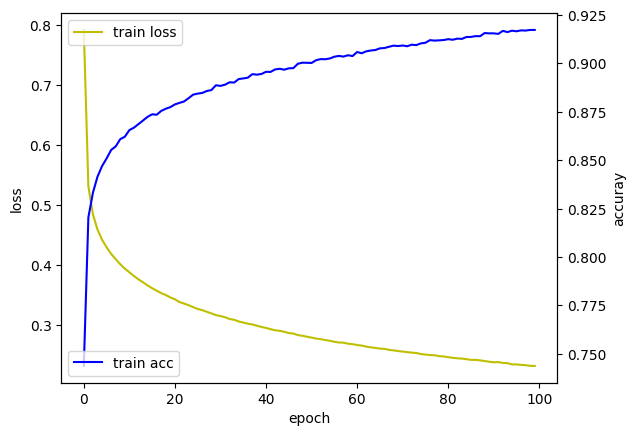

In [7]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [8]:
np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[100:]
Y_val = Y_train[100:]
X_train = X_train[:100]
Y_train = Y_train[:100]

X_train = X_train.reshape(100, 784).astype('float32') / 255.0
X_val = X_val.reshape(59900, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [9]:
# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [10]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=32, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [11]:
# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [12]:
# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/100
4/4 [==============================] - 3s 917ms/step - loss: 2.3714 - accuracy: 0.0500 - val_loss: 2.2625 - val_accuracy: 0.1116
Epoch 2/100
4/4 [==============================] - 2s 796ms/step - loss: 2.2359 - accuracy: 0.1300 - val_loss: 2.1846 - val_accuracy: 0.1791
Epoch 3/100
4/4 [==============================] - 2s 794ms/step - loss: 2.1313 - accuracy: 0.2000 - val_loss: 2.1405 - val_accuracy: 0.2620
Epoch 4/100
4/4 [==============================] - 2s 789ms/step - loss: 2.0624 - accuracy: 0.3100 - val_loss: 2.1008 - val_accuracy: 0.3101
Epoch 5/100
4/4 [==============================] - 2s 784ms/step - loss: 1.9920 - accuracy: 0.4300 - val_loss: 2.0632 - val_accuracy: 0.3348
Epoch 6/100
4/4 [==============================] - 2s 803ms/step - loss: 1.9505 - accuracy: 0.4200 - val_loss: 2.0208 - val_accuracy: 0.3563
Epoch 7/100
4/4 [==============================] - 2s 811ms/step - loss: 1.8960 - accuracy: 0.4500 - val_loss: 2.0002 - val_accuracy: 0.3948
Epoch 8/100
4

KeyboardInterrupt: 

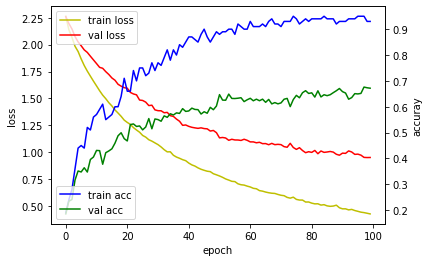

In [52]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()